# Online_Shoppers_Purchasing_Intention_Dataset_Data_Set

In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Below is some basic info for the dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [4]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing data in the dataset 

In [5]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
print('Numbers of Possible values')
for col in data.columns:
    print(col,': ',len(set(data[col])))

Numbers of Possible values
Administrative :  27
Administrative_Duration :  3335
Informational :  17
Informational_Duration :  1258
ProductRelated :  311
ProductRelated_Duration :  9551
BounceRates :  1872
ExitRates :  4777
PageValues :  2704
SpecialDay :  6
Month :  10
OperatingSystems :  8
Browser :  13
Region :  9
TrafficType :  20
VisitorType :  3
Weekend :  2
Revenue :  2


For simplicity, change weekend and Revenue in numeric notation

In [7]:
data['Weekend'] = data['Weekend']*1
data['Revenue'] = data['Revenue']*1

In [8]:
data.groupby('Revenue').size() 

Revenue
0    10422
1     1908
dtype: int64

So less than 2000 records with revenues in the dataset

In [9]:
data.pivot_table(index='Month',columns='Revenue',values='Weekend',aggfunc='count')

Revenue,0,1
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115


Nov has the largest number of purchases while Feb has the smallest

In [10]:
data.pivot_table(index='VisitorType',columns='Revenue',values='Weekend',aggfunc='count')

Revenue,0,1
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470


Most visitors are returning visitors. However, portion of purchase for new visitor is higher than returning visitor

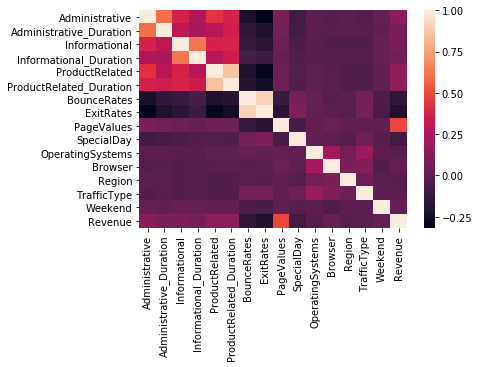

In [11]:
corr = sns.heatmap(data.corr())

From the heat map, there are some insights 
1. Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration are correlated in a rather high degree. It is possible to do reduce the dimension of the dataset 
2. PageValues has the highest correlation with Revenue 
3. BounceRates and ExitRates have negative correlations with Revenue 

Since PageValues is positively correlated with Revenue, now a logistic regression is carried to study the effect 

In [12]:
X = data['PageValues']
y = data['Revenue']
X = sm.add_constant(X)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.319902
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12328
Method:                           MLE   Df Model:                            1
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:                  0.2575
Time:                        11:48:55   Log-Likelihood:                -3944.4
converged:                       True   LL-Null:                       -5312.4
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4164      0.034    -70.199      0.000      -2.484      -2.349
PageValues     0.0890      0.

C:\Users\Yuasto\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


So a higher PageValues will increase the probability of having a purchase as the p-value is less than 0.05

As said before, Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, and ProductRelated_Duration are all correlated together. As a result, only on variable is kept for further analysis (Administrative_Duration)
<br>
This also applies to BounceRates and ExitRates (BounceRates is kept)

In [13]:
data2 = data.drop(['Administrative', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'ExitRates'],axis=1 )

In [14]:
data2.head()

,Administrative_Duration,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.00,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.05,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.02,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


Next step is to include dummy variables for Month and VisitorType

In [15]:
Month_dummy = pd.get_dummies(data2['Month'],drop_first=True)
Visitor_dummy = pd.get_dummies(data2['VisitorType'],drop_first = True)

In [16]:
data3 = data2.drop(['Month','VisitorType'],axis=1 )

In [17]:
data4 = pd.concat([data3,Month_dummy,Visitor_dummy],axis=1)

In [18]:
data4.head()

,Administrative_Duration,BounceRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,...,Feb,Jul,June,Mar,May,Nov,Oct,Sep,Other,Returning_Visitor
0,0.0,0.20,0.0,0.0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.0,0.00,0.0,0.0,2,2,1,2,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.0,0.20,0.0,0.0,4,1,9,3,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.0,0.05,0.0,0.0,3,2,2,4,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.0,0.02,0.0,0.0,3,3,1,4,1,0,...,1,0,0,0,0,0,0,0,0,1


Similar to previous action, first is to carry out logistic regression to study the impact of each combination

In [19]:
x_variable = list(data4.columns.values)
x_variable.remove('Revenue')

X = data4[x_variable]
y = data4['Revenue']
X  = sm.add_constant(X)

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.295840
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                Revenue   No. Observations:                12330
Model:                          Logit   Df Residuals:                    12309
Method:                           MLE   Df Model:                           20
Date:                Sat, 24 Aug 2019   Pseudo R-squ.:                  0.3134
Time:                        11:48:55   Log-Likelihood:                -3647.7
converged:                       True   LL-Null:                       -5312.4
                                        LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.8296      0.194     -9.444      0.000      -2.209   

So there are some important variables that can be used to determine porchase 
<br>With positive influence: Administrative_Duration, PageValues, Browser, Weekend, Nov
<br>With negative influence: BounceRates, Dec, Feb, Mar, May,Returning_Visitor
<br><br>In general, behavoir while browsing, month, weekend, and times of buying can predict the purchase 

Next is to create a deep learning model to do the prediction 
<br>Based on results from logistic regression, only some variables will be used in the model 

In [20]:
data5 = data[['Administrative_Duration','BounceRates','PageValues','Browser','Revenue']]

In [21]:
data5 = pd.concat([data5,Month_dummy,Visitor_dummy],axis=1 )

### Modeling 

In [24]:
X=data5.drop('Revenue',axis=1)
y=data5['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. First is decision tree 

In [25]:
distree=DecisionTreeClassifier()
distree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
distree.score(X_test,y_test)

0.8588807785888077

In [27]:
y_predict=distree.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[1900,  155],
       [ 193,  218]], dtype=int64)

#### 2. KNN

In [28]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8714517437145174

In [29]:
y_predict=knn.predict(X_test)
confusion_matrix(y_test,y_predict)

array([[1942,  113],
       [ 204,  207]], dtype=int64)

It seems decision tree is better than KNN as decision tree can predict successful purchases more accurately so there will be no revenue loss

#### 3. Neural Network

First step is to create one more dataset for validation 

In [32]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

Next step is to normalize dataset 

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

C:\Users\Yuasto\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Yuasto\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Yuasto\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


Now we can build the network

In [41]:
def neural_model(n_first,n_second,n_third):
    model = Sequential()
    
    model.add(Dense(n_first,activation='relu',input_dim=X_train.shape[1])) 
    model.add(Dense(n_second,activation='relu')) 
    model.add(Dense(n_third, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(optimizer='adam',loss='binary_crossentropy')
    return model

In [44]:
result = pd.DataFrame(columns=['first_hidden','second_hidden','third_hidden','binary_crossentropy'])

Hyperparameter selection

In [45]:
for first_layer in [10,20]:
    for second_layer in [12,15]:
        for third_layer in [3,5]:
            model = neural_model(first_layer,second_layer,third_layer)
            model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
            binary_crossentropy = model.evaluate(X_valid, y_valid)
            result=result.append({'first_hidden':first_layer,'second_hidden':second_layer,'third_hidden':third_layer,'binary_crossentropy':binary_crossentropy},ignore_index=True)

Train on 7891 samples, validate on 1973 samples
Epoch 1/50
7891/7891 [==============================] - 1s 155us/step - loss: 0.4444 - val_loss: 0.3542
Epoch 2/50
7891/7891 [==============================] - 0s 35us/step - loss: 0.3207 - val_loss: 0.3117
Epoch 3/50
7891/7891 [==============================] - 0s 35us/step - loss: 0.2896 - val_loss: 0.2966
Epoch 4/50
7891/7891 [==============================] - 0s 35us/step - loss: 0.2747 - val_loss: 0.2876
Epoch 5/50
7891/7891 [==============================] - 0s 37us/step - loss: 0.2648 - val_loss: 0.2817
Epoch 6/50
7891/7891 [==============================] - 0s 35us/step - loss: 0.2580 - val_loss: 0.2763
Epoch 7/50
7891/7891 [==============================] - 0s 35us/step - loss: 0.2527 - val_loss: 0.2720
Epoch 8/50
7891/7891 [==============================] - 0s 48us/step - loss: 0.2496 - val_loss: 0.2730
Epoch 9/50
7891/7891 [==============================] - 0s 40us/step - loss: 0.2475 - val_loss: 0.2685
Epoch 10/50
7891/7891 [=

7891/7891 [==============================] - 0s 53us/step - loss: 0.2260 - val_loss: 0.2582
Epoch 29/50
7891/7891 [==============================] - 0s 42us/step - loss: 0.2262 - val_loss: 0.2588
Epoch 30/50
7891/7891 [==============================] - 0s 50us/step - loss: 0.2256 - val_loss: 0.2579
Epoch 31/50
7891/7891 [==============================] - 0s 41us/step - loss: 0.2249 - val_loss: 0.2579
Epoch 32/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2249 - val_loss: 0.2609
Epoch 33/50
7891/7891 [==============================] - 0s 55us/step - loss: 0.2243 - val_loss: 0.2592
Epoch 34/50
7891/7891 [==============================] - 0s 57us/step - loss: 0.2243 - val_loss: 0.2613
Epoch 35/50
7891/7891 [==============================] - 0s 55us/step - loss: 0.2236 - val_loss: 0.2598
Epoch 36/50
7891/7891 [==============================] - 0s 56us/step - loss: 0.2230 - val_loss: 0.2587
Epoch 37/50
7891/7891 [==============================] - 0s 56us/step - loss

Epoch 5/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2517 - val_loss: 0.2792
Epoch 6/50
7891/7891 [==============================] - 0s 58us/step - loss: 0.2474 - val_loss: 0.2746
Epoch 7/50
7891/7891 [==============================] - 0s 63us/step - loss: 0.2437 - val_loss: 0.2759
Epoch 8/50
7891/7891 [==============================] - 0s 58us/step - loss: 0.2408 - val_loss: 0.2732
Epoch 9/50
7891/7891 [==============================] - 0s 58us/step - loss: 0.2391 - val_loss: 0.2741
Epoch 10/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2375 - val_loss: 0.2721
Epoch 11/50
7891/7891 [==============================] - 0s 57us/step - loss: 0.2367 - val_loss: 0.2673
Epoch 12/50
7891/7891 [==============================] - 0s 58us/step - loss: 0.2354 - val_loss: 0.2686
Epoch 13/50
7891/7891 [==============================] - 0s 57us/step - loss: 0.2346 - val_loss: 0.2657
Epoch 14/50
7891/7891 [==============================] - 0s 60us/step

Epoch 33/50
7891/7891 [==============================] - 0s 61us/step - loss: 0.2290 - val_loss: 0.2628
Epoch 34/50
7891/7891 [==============================] - 0s 60us/step - loss: 0.2289 - val_loss: 0.2614
Epoch 35/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2285 - val_loss: 0.2672
Epoch 36/50
7891/7891 [==============================] - 0s 61us/step - loss: 0.2274 - val_loss: 0.2616
Epoch 37/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2278 - val_loss: 0.2634
Epoch 38/50
7891/7891 [==============================] - 0s 60us/step - loss: 0.2268 - val_loss: 0.2623
Epoch 39/50
7891/7891 [==============================] - 0s 59us/step - loss: 0.2256 - val_loss: 0.2666
Epoch 40/50
7891/7891 [==============================] - 0s 61us/step - loss: 0.2251 - val_loss: 0.2636
Epoch 41/50
7891/7891 [==============================] - 0s 60us/step - loss: 0.2250 - val_loss: 0.2580
Epoch 42/50
7891/7891 [==============================] - 0s 61us

Epoch 10/50
7891/7891 [==============================] - 0s 63us/step - loss: 0.2333 - val_loss: 0.2668
Epoch 11/50
7891/7891 [==============================] - 0s 62us/step - loss: 0.2324 - val_loss: 0.2662
Epoch 12/50
7891/7891 [==============================] - 0s 62us/step - loss: 0.2301 - val_loss: 0.2690
Epoch 13/50
7891/7891 [==============================] - 0s 62us/step - loss: 0.2296 - val_loss: 0.2680
Epoch 14/50
7891/7891 [==============================] - 1s 69us/step - loss: 0.2280 - val_loss: 0.2682
Epoch 15/50
7891/7891 [==============================] - 0s 62us/step - loss: 0.2269 - val_loss: 0.2724
Epoch 16/50
7891/7891 [==============================] - 1s 64us/step - loss: 0.2271 - val_loss: 0.2645
Epoch 17/50
7891/7891 [==============================] - 0s 62us/step - loss: 0.2272 - val_loss: 0.2675
Epoch 18/50
7891/7891 [==============================] - 1s 64us/step - loss: 0.2257 - val_loss: 0.2628
Epoch 19/50
7891/7891 [==============================] - 0s 61us

Epoch 38/50
7891/7891 [==============================] - 0s 49us/step - loss: 0.2192 - val_loss: 0.2586
Epoch 39/50
7891/7891 [==============================] - 0s 43us/step - loss: 0.2182 - val_loss: 0.2619
Epoch 40/50
7891/7891 [==============================] - 0s 43us/step - loss: 0.2180 - val_loss: 0.2608
Epoch 41/50
7891/7891 [==============================] - 0s 41us/step - loss: 0.2180 - val_loss: 0.2600
Epoch 42/50
7891/7891 [==============================] - 0s 43us/step - loss: 0.2183 - val_loss: 0.2597
Epoch 43/50
7891/7891 [==============================] - 0s 57us/step - loss: 0.2172 - val_loss: 0.2634
Epoch 44/50
7891/7891 [==============================] - 0s 48us/step - loss: 0.2174 - val_loss: 0.2600
Epoch 45/50
7891/7891 [==============================] - 0s 45us/step - loss: 0.2170 - val_loss: 0.2678
Epoch 46/50
7891/7891 [==============================] - 1s 66us/step - loss: 0.2164 - val_loss: 0.2693
Epoch 47/50
7891/7891 [==============================] - 0s 42us

In [46]:
result

,first_hidden,second_hidden,third_hidden,binary_crossentropy
0,10.0,12.0,3.0,0.261085
1,10.0,12.0,5.0,0.263534
2,10.0,15.0,3.0,0.263391
3,10.0,15.0,5.0,0.259425
4,20.0,12.0,3.0,0.264038
5,20.0,12.0,5.0,0.261787
6,20.0,15.0,3.0,0.267415
7,20.0,15.0,5.0,0.259240


In [48]:
min_index = result['binary_crossentropy'].idxmin()

In [49]:
first_hidden_best = result['first_hidden'][min_index]
second_hidden_best = result['second_hidden'][min_index]
third_hidden_best = result['third_hidden'][min_index]

In [53]:
first_hidden_best  = int(first_hidden_best)
second_hidden_best = int(second_hidden_best)
third_hidden_best  = int(third_hidden_best)

min_model = neural_model(first_hidden_best,second_hidden_best,third_hidden_best)
min_model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))
binary_crossentropy = min_model.evaluate(X_test, y_test)

print("Error for the test set: ", binary_crossentropy)

Train on 7891 samples, validate on 1973 samples
Epoch 1/50
7891/7891 [==============================] - 2s 245us/step - loss: 0.3750 - val_loss: 0.3111
Epoch 2/50
7891/7891 [==============================] - 0s 47us/step - loss: 0.2751 - val_loss: 0.2887
Epoch 3/50
7891/7891 [==============================] - 0s 52us/step - loss: 0.2579 - val_loss: 0.2842
Epoch 4/50
7891/7891 [==============================] - 0s 38us/step - loss: 0.2500 - val_loss: 0.2741
Epoch 5/50
7891/7891 [==============================] - 0s 41us/step - loss: 0.2443 - val_loss: 0.2745
Epoch 6/50
7891/7891 [==============================] - 0s 54us/step - loss: 0.2412 - val_loss: 0.2690
Epoch 7/50
7891/7891 [==============================] - 0s 51us/step - loss: 0.2382 - val_loss: 0.2663
Epoch 8/50
7891/7891 [==============================] - 0s 46us/step - loss: 0.2362 - val_loss: 0.2667
Epoch 9/50
7891/7891 [==============================] - 0s 46us/step - loss: 0.2339 - val_loss: 0.2676
Epoch 10/50
7891/7891 [=